<a href="https://colab.research.google.com/github/aarif72/Stock-Price-Prediction/blob/main/hdfc_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset @ https://finance.yahoo.com/quote/HBD/history/

In [3]:
import pandas as pd

df = pd.read_csv('/content/HDB.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-23,50.035000,50.310001,49.549999,49.584999,48.006210,1208200
1,2018-08-24,49.900002,50.080002,49.639999,50.064999,48.470924,726400
2,2018-08-27,50.145000,50.759998,50.105000,50.705002,49.090553,860200
3,2018-08-28,50.805000,50.845001,50.264999,50.544998,48.935642,461600
4,2018-08-29,50.285000,50.750000,50.200001,50.709999,49.095387,1101400
...,...,...,...,...,...,...,...
1252,2023-08-16,64.059998,64.349998,63.500000,63.570000,63.570000,1949500
1253,2023-08-17,63.959999,63.959999,63.240002,63.240002,63.240002,1385800
1254,2023-08-18,63.000000,63.070000,62.439999,62.849998,62.849998,2737300
1255,2023-08-21,63.290001,63.820000,62.889999,63.660000,63.660000,2134600


In [4]:
df = df[['Date','Close']]
df

,Date,Close
0,2018-08-23,49.584999
1,2018-08-24,50.064999
2,2018-08-27,50.705002
3,2018-08-28,50.544998
4,2018-08-29,50.709999
...,...,...
1252,2023-08-16,63.570000
1253,2023-08-17,63.240002
1254,2023-08-18,62.849998
1255,2023-08-21,63.660000


In [ ]:
df['Date']

0       2018-08-23
1       2018-08-24
2       2018-08-27
3       2018-08-28
4       2018-08-29
           ...    
1252    2023-08-16
1253    2023-08-17
1254    2023-08-18
1255    2023-08-21
1256    2023-08-22
Name: Date, Length: 1257, dtype: object

In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year,month,day = int(split[0]), int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

datetime_object = str_to_datetime('2020-05-01')
datetime_object

datetime.datetime(2020, 5, 1, 0, 0)

In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-08-23
1      2018-08-24
2      2018-08-27
3      2018-08-28
4      2018-08-29
          ...    
1252   2023-08-16
1253   2023-08-17
1254   2023-08-18
1255   2023-08-21
1256   2023-08-22
Name: Date, Length: 1257, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2018-08-23,49.584999
2018-08-24,50.064999
2018-08-27,50.705002
2018-08-28,50.544998
2018-08-29,50.709999
...,...
2023-08-16,63.570000
2023-08-17,63.240002
2023-08-18,62.849998


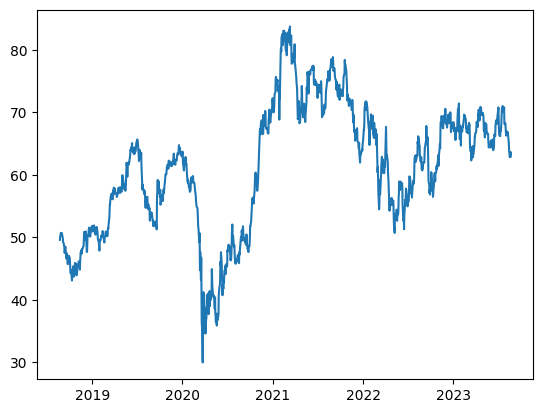

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-22',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,78.300003,79.169998,78.059998,78.199997
1,2021-03-26,79.169998,78.059998,78.199997,79.459999
2,2021-03-29,78.059998,78.199997,79.459999,78.800003
3,2021-03-30,78.199997,79.459999,78.800003,80.900002
4,2021-03-31,79.459999,78.800003,80.900002,77.690002
...,...,...,...,...,...
246,2022-03-16,56.869999,59.160000,60.110001,61.639999
247,2022-03-17,59.160000,60.110001,61.639999,61.869999
248,2022-03-18,60.110001,61.639999,61.869999,62.880001
249,2022-03-21,61.639999,61.869999,62.880001,61.849998


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:,0]

  middle_matrix = df_as_np[:,1:-1]
  X = middle_matrix.reshape(len(dates), middle_matrix.shape[1],1)

  Y = df_as_np[:,-1]

  return dates,X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape,X.shape,y.shape

((251,), (251, 3, 1), (251,))

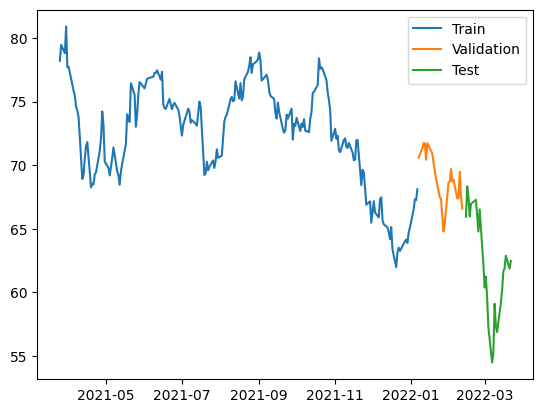

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train,X_train,y_train = dates[:q_80],X[:q_80],y[:q_80]


dates_val, X_val,y_val = dates[q_80:q_90], X[q_80:q_90],y[q_80:q_90]
dates_test, X_test,y_test = dates[q_90:],X[q_90:],y[q_90:]

plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)

plt.legend(['Train','Validation','Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32,activation='relu'),
                    layers.Dense(32,activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate = 0.001),
              metrics = ['mean_absolute_error'])

model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 103ms/step - loss: 5269.4268 - mean_absolute_error: 72.4815 - val_loss: 4693.9482 - val_mean_absolute_error: 68.4845
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 5204.4834 - mean_absolute_error: 72.0332 - val_loss: 4647.0562 - val_mean_absolute_error: 68.1413
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 5154.7192 - mean_absolute_error: 71.6868 - val_loss: 4594.3745 - val_mean_absolute_error: 67.7536
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 5096.0278 - mean_absolute_error: 71.2764 - val_loss: 4530.2612 - val_mean_absolute_error: 67.2788
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 5019.6191 - mean_absolute_error: 70.7387 - val_loss: 4441.6157 - val_mean_absolute_error: 66.6166
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 4914.8599 - mean_absolute_error: 69.9930 - val_loss: 4318.7593 - val_mean_absolu

7/7 [==============================] - 1s 3ms/step


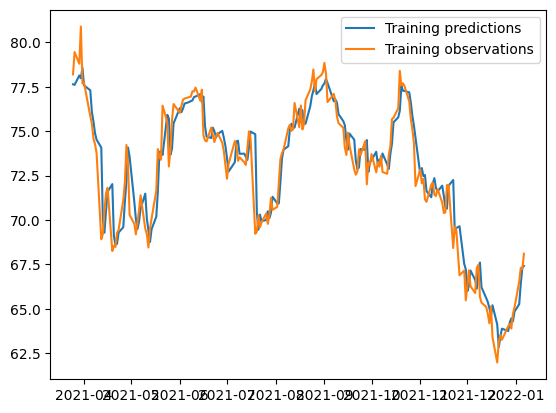

In [ ]:
train_predictions= model.predict(X_train).flatten()

plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.legend(['Training predictions','Training observations'])

1/1 [==============================] - 0s 22ms/step


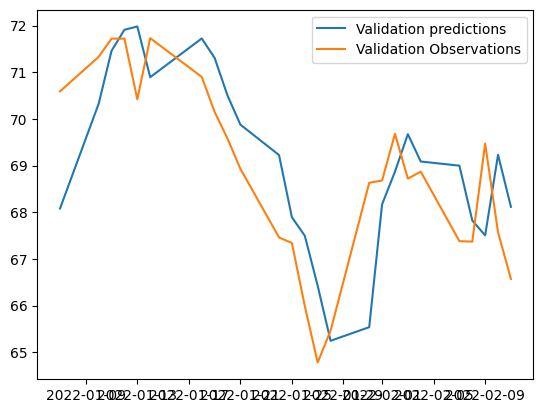

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.legend(['Validation predictions','Validation Observations'])

1/1 [==============================] - 0s 23ms/step


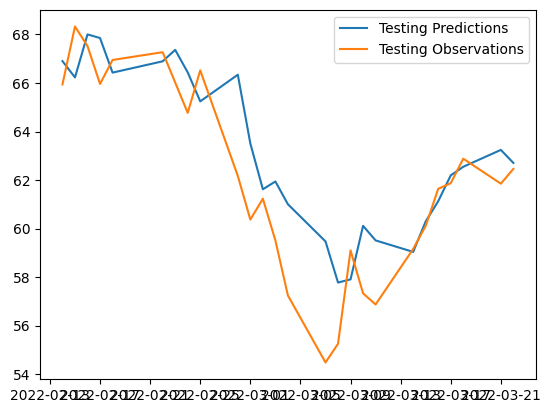

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

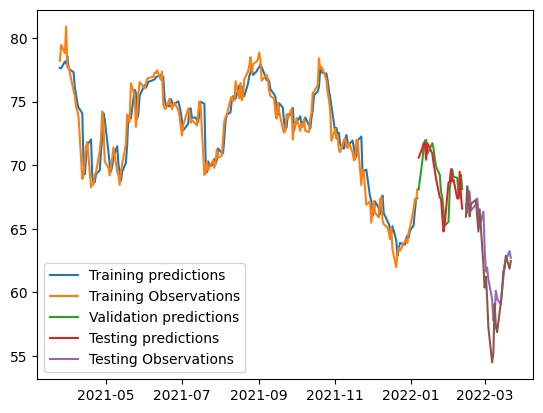

In [ ]:
plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(['Training predictions',
            'Training Observations',
            'Validation predictions',
            'Testing predictions',
            'Testing Observations'])